<img src="Images/PU.png" width="100%">

#### Course Name : AI 702 Deep Learning for Professionals: NLP: word2vec  
##### Notebook compiled by : Rajiv Kale, Consultant at Learning and Development 
#### This notebook demonstrates how word embeddings get aligned as you train for more epochs
** Important ! ** For internal circulation olny

<img src="Images/vector_alignment.png" width="60%">

https://vimeo.com/112168934

Define Training Data

In [1]:
sentences = [['this', 'is', 'the', 'first',  'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'third',  'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'fourth', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'fifth',  'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'sixth',  'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'fifth',  'sentence', 'for', 'embedding'],
             ['this', 'is', 'the', 'fourth',  'sentence', 'for', 'embedding'],
             ['this', 'is', 'the', 'sixth',  'sentence', 'for', 'embedding'],
             ['this', 'is', 'the', 'seventh', 'sentence', 'for', 'embedding'],
             ['this', 'is', 'the', 'eighth',  'sentence', 'for', 'embedding']]
           

Take word2vec from gensim and define model parameters

In [2]:
from gensim.models import Word2Vec
model = Word2Vec(sentences, min_count=1, size=100)

C:\Users\rajiv_kale\AppData\Local\Continuum\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
C:\Users\rajiv_kale\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Train model for a few epochs

In [3]:
model.train(sentences, total_examples=len(sentences), epochs=10)

(107, 770)

In [4]:
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])

Word2Vec(vocab=15, size=100, alpha=0.025)
['seventh', 'fifth', 'first', 'second', 'word2vec', 'fourth', 'sixth', 'for', 'embedding', 'the', 'is', 'sentence', 'third', 'eighth', 'this']
[-5.0830878e-03 -3.6210152e-03 -4.6149879e-03  7.0913543e-04
  3.3029707e-03  1.0414299e-03  2.6116811e-03 -3.6260178e-03
 -3.0182945e-03 -2.0232345e-03 -2.5549966e-03 -4.1620820e-03
  3.2915825e-03 -1.2376781e-03 -4.8367810e-04  9.0311444e-04
 -3.0533148e-03 -3.9284662e-03 -2.7151145e-03  2.4260732e-03
 -3.4846943e-03 -2.1869496e-03 -8.0227526e-04  2.6392154e-03
 -2.7151213e-03  4.5155920e-03  2.0242146e-04 -4.5422446e-03
  1.7245578e-03 -3.7897762e-03 -5.4144673e-04 -4.4743461e-03
 -4.1091773e-03 -1.9470220e-03  2.7983875e-03  1.0490491e-03
 -4.4304160e-03 -7.9730467e-04  9.6278870e-04  8.0629700e-04
 -4.8781382e-03  1.5358713e-03  4.7452310e-03 -4.4292831e-03
  3.1756661e-03 -2.8587834e-03  1.1620254e-03  4.5460211e-03
 -2.9476329e-03 -4.4718930e-03 -3.3265636e-03 -2.3373610e-03
 -6.7809381e-04  3.721

C:\Users\rajiv_kale\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Let us plot vectors.. we will have to do dimensionality Reduction to be able to plot at 2D

C:\Users\rajiv_kale\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


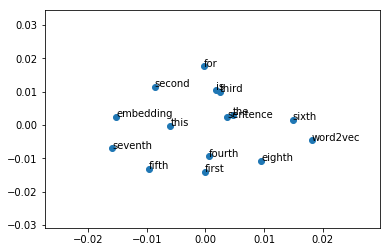

In [5]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
%matplotlib inline
# fit a 2D PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


AS can be seen above vectors look pretty random

Let us train the model for 800 or more epochs and see if vectors get adjusted

In [6]:
model.train(sentences, total_examples=len(sentences), epochs=800)

(7579, 61600)

C:\Users\rajiv_kale\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


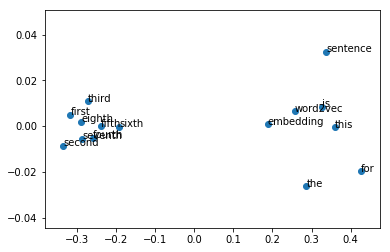

In [7]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
%matplotlib inline
# fit a 2D PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

As can be seen above vectors for interchangeable words are getting aligned (coming to closer)